In [6]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Accessing mesh dimension

#### 1D

1


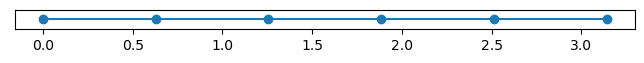

In [7]:
lx = np.pi
n  = 5
mesh = IntervalMesh(n, 0, lx)
print(mesh.topology().dim())
plot(mesh)

In [8]:
x_r = 0.5
cell_index = mesh.bounding_box_tree().compute_first_entity_collision(Point(x_r))
print("cell_index is for 1D is: ",cell_index)
num_entity = mesh.num_entities(mesh.topology().dim())
print("num_entity is for 1D is: ",num_entity)

cell_index is for 1D is:  0
num_entity is for 1D is:  5


#### 2D

In [9]:
lx, ly = 0.1, 0.05
nx, ny = 50, 25

mesh1 = RectangleMesh(Point(0,0),Point(lx,ly), nx, ny)
print(mesh1.topology().dim())

2


In [10]:
x_r = 0.2
cell_index = mesh1.bounding_box_tree().compute_first_entity_collision(Point(x_r))
print("cell_index is for 2D is: ",cell_index)
num_entity = mesh1.num_entities(mesh1.topology().dim())
print("num_entity is for 2D is: ",num_entity)

cell_index is for 2D is:  4294967295
num_entity is for 2D is:  2500


### DEGREES OF FREEDOM
A finite element function like u is expressed as a linear combination of basis functions $\phi_j$, spanning the space V:

$u=\sum_{j=1}^N = U_j \phi_j $(2.13)

By writing solve(a == L, u, bc) in the program, a linear system will be formed from a and L, and this system is solved for the values U1,…,UN. The values $U_1,…,U_N$ are known as the degrees of freedom ("dofs") or nodal values of u.

In [11]:
mesh = UnitSquareMesh(2, 2)
coordinates = mesh.coordinates()
coordinates

array([[0. , 0. ],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 0.5],
       [0.5, 0.5],
       [1. , 0.5],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

If we therefore want to know the values at the vertices, we need to call the function u.compute_vertex_values(). This function returns the values at all the vertices of the mesh as a numpy array with the same numbering as for the vertices of the mesh, for example:

In [12]:
vertices = 5
mesh = UnitIntervalMesh(vertices)

V = FunctionSpace(mesh, "CG", 1)
u = Function(V)
print("Coordinates: ", u.compute_vertex_values(mesh))

f = Expression("x[0]*x[0]", degree = 2)
u.interpolate(f)
u_array = u.compute_vertex_values()
print("Vertex values: ", u_array)

Coordinates:  [0. 0. 0. 0. 0. 0.]
Vertex values:  [0.   0.04 0.16 0.36 0.64 1.  ]


The order of the vertices on mesh

array([[0. , 0. ],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 0.5],
       [0.5, 0.5],
       [1. , 0.5],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

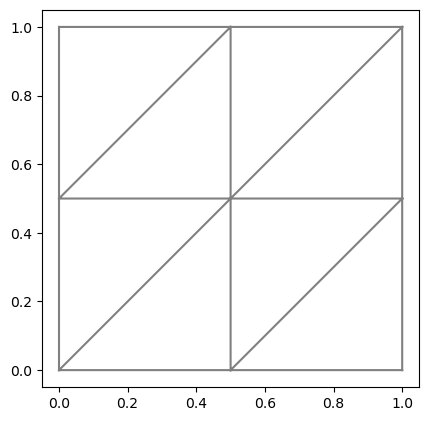

In [13]:
mesh = UnitSquareMesh(2, 2)
coordinates = mesh.coordinates()
plot(mesh)
coordinates

[1.  0.5 1.5 0.  1.  2.  0.5 1.5 1. ]


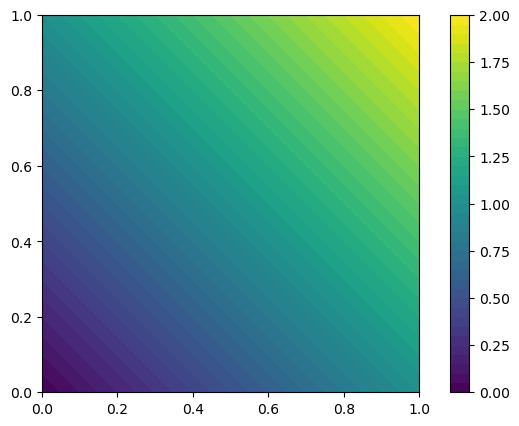

In [14]:
V = FunctionSpace(mesh, "CG", 1)
u = interpolate(Expression("x[0]+x[1]", degree = 1),V)
a = plot(u)
plt.colorbar(a)
print(u.vector()[:])

In [15]:
vertex_u = u.compute_vertex_values()

for i,x in enumerate(coordinates):
    print(i,"\t",x,"\t", vertex_u[i] ,"\t", u(x))


0 	 [0. 0.] 	 0.0 	 1.3877787807814457e-17
1 	 [0.5 0. ] 	 0.5 	 0.5
2 	 [1. 0.] 	 1.0 	 1.0
3 	 [0.  0.5] 	 0.5 	 0.5
4 	 [0.5 0.5] 	 1.0 	 1.0
5 	 [1.  0.5] 	 1.5 	 1.5
6 	 [0. 1.] 	 1.0 	 1.0
7 	 [0.5 1. ] 	 1.5 	 1.5
8 	 [1. 1.] 	 2.0 	 2.0


Now, nodal_values[v2d[i]] will give us the value of the degree of freedom corresponding to vertex i (v2d[i]). In particular, nodal_values[v2d] is an array with all the elements in the same (vertex numbered) order as coordinates. The inverse map, from degrees of freedom number to vertex number is given by dof_to_vertex_map(V). This means that we may call coordinates[dof_to_vertex_map(V)] to get an array of all the coordinates in the same order as the degrees of freedom. Note that these mappings are only available in FEniCS for P1 elements.

In [16]:
v2d = vertex_to_dof_map(V)
print(v2d)
for i in v2d:
    print(u.vector()[i])

[3 6 8 1 4 7 0 2 5]
0.0
0.5
1.0
0.5
1.0
1.5
1.0
1.5
2.0


In [17]:
element = V.element()
dofmap = V.dofmap()
for cell in cells(mesh):
    print("Cell Index: ",dofmap.cell_dofs(cell.index()))
    print("Cell Coordinates: \n", element.tabulate_dof_coordinates(cell))

Cell Index:  [3 6 4]
Cell Coordinates: 
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]]
Cell Index:  [3 1 4]
Cell Coordinates: 
 [[0.  0. ]
 [0.  0.5]
 [0.5 0.5]]
Cell Index:  [6 8 7]
Cell Coordinates: 
 [[0.5 0. ]
 [1.  0. ]
 [1.  0.5]]
Cell Index:  [6 4 7]
Cell Coordinates: 
 [[0.5 0. ]
 [0.5 0.5]
 [1.  0.5]]
Cell Index:  [1 4 2]
Cell Coordinates: 
 [[0.  0.5]
 [0.5 0.5]
 [0.5 1. ]]
Cell Index:  [1 0 2]
Cell Coordinates: 
 [[0.  0.5]
 [0.  1. ]
 [0.5 1. ]]
Cell Index:  [4 7 5]
Cell Coordinates: 
 [[0.5 0.5]
 [1.  0.5]
 [1.  1. ]]
Cell Index:  [4 2 5]
Cell Coordinates: 
 [[0.5 0.5]
 [0.5 1. ]
 [1.  1. ]]


In [21]:
for cell in cells(mesh):
    cell_dofs = dofmap.cell_dofs(cell.index())
    print(dofmap.tabulate_local_to_global_dofs()[cell_dofs])

[3 6 4]
[3 1 4]
[6 8 7]
[6 4 7]
[1 4 2]
[1 0 2]
[4 7 5]
[4 2 5]
